# Modeling with Scaling

This notebook was used to see how well houses prices accounted for renovation features we were looking at. 
The features were scaled for the sake of model performance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, median_absolute_error
import os
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [2]:
# use absolute path to retrieve datasets

train = pd.read_csv(os.path.abspath('./datasets/cleaned_train.csv'))

[source for absolute path](https://stackoverflow.com/questions/51520/how-to-get-an-absolute-file-path-in-python)

In [3]:
train.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,total_baths,bsmt_finished,size_n_qual,bed_n_bath,fin_bsmt_fin_qual,bsmt_fin_n_ceiling,bsmt_finished_with_bath,bsmt_finished_with_halfbath,bsmt_size_fin_sf,overall_qual_cond
0,109,60,RL,77.504886,13517,2,3,4,4,CulDSac,...,3.0,533.0,8874,9.0,2665.0,533.0,0.0,0.0,386425.0,48
1,544,60,RL,43.000000,11492,2,3,4,4,CulDSac,...,4.0,637.0,14854,16.0,3185.0,1274.0,637.0,0.0,581581.0,35
2,153,20,RL,68.000000,7922,2,4,4,4,Inside,...,2.0,731.0,5285,6.0,3655.0,731.0,731.0,0.0,772667.0,35
3,318,60,RL,73.000000,9802,2,4,4,4,Inside,...,3.0,0.0,7220,9.0,0.0,0.0,0.0,0.0,0.0,25
4,255,50,RL,82.000000,14235,2,3,4,4,Inside,...,2.0,0.0,8670,6.0,0.0,0.0,0.0,0.0,0.0,48


In [4]:
train.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',
       

In [5]:
drop_lst = []
drop_lst.extend(['pool_area',  #not applicable to most homes
                'enclosed_porch',
                '3ssn_porch',
                'screen_porch',
                'garage_yr_blt',
                'functional',
               'low_qual_fin_sf',
                'garage_qual',
                'paved_drive', 
                'central_air',
                'bsmtfin_sf_2',
                'kitchen_abvgr',
               'utilities',
               'land_slope', 
               'lot_area',
               'street',
               'land_slope', 
                'yr_sold',
                'bsmtfin_type_2',
                 'bsmtfin_sf_2',
                'exterior_2nd',
                'heating',
                'electrical','condition_1', 
                 'condition_2']) 

In [6]:
best_lasso_features = ['lot_area',
 'bsmt_fin_n_ceiling',
 'functional',
 'total_bsmt_sf',
 'overall_cond',
 'year_built',
 'overall_qual',
 'gr_liv_area']

In [7]:
train.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',
       

In [8]:
# add roof material, make garage type a dummy variable 

focus_features = ['kitchen_qual',
                 'garage_type', 'bsmt_full_bath',
                  'bsmt_half_bath',
                 'bsmt_finished',
                 'bsmt_qual',
                 'bsmt_half_bath']

# Baseline

In [9]:
# perserving baseline from first model attempt
baseline = train['saleprice'].mean()
baseline_list = [baseline for i in range(2049)]
baseline_score = r2_score(train['saleprice'], baseline_list)
baseline_score

0.0

# Prepping for the model

In [10]:
train.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',
       

In [11]:
# making list of training feature names

features = [c for c in focus_features if 
            (c != 'saleprice') & (c != 'id') & (c not in drop_lst)]

y = train['saleprice']

In [12]:
X = train[set(features)]
X = pd.get_dummies(X, columns = ['garage_type'], drop_first=True)

y = train['saleprice']

In [13]:
X.head()

,kitchen_qual,bsmt_full_bath,bsmt_finished,bsmt_half_bath,bsmt_qual,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd
0,2,0.0,533.0,0.0,1,0,1,0,0,0,0
1,2,1.0,637.0,0.0,2,0,1,0,0,0,0
2,2,1.0,731.0,0.0,1,0,0,0,0,0,1
3,1,0.0,0.0,0.0,2,0,0,0,1,0,0
4,1,0.0,0.0,0.0,0,0,0,0,0,0,1


In [14]:
X.columns

Index(['kitchen_qual', 'bsmt_full_bath', 'bsmt_finished', 'bsmt_half_bath',
       'bsmt_qual', 'garage_type_2Types', 'garage_type_Attchd',
       'garage_type_Basment', 'garage_type_BuiltIn', 'garage_type_CarPort',
       'garage_type_Detchd'],
      dtype='object')

## Train Test Split

In [15]:
# finding missing columns in test vs train data
def find_missing_test_columns(train, test):
    return [col for col in train.columns if col not in test.columns]

In [16]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
find_missing_test_columns(X_train, X_test)

[]

## Scaling

In [18]:
# scaling data before fitting

ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)  #or in same line - fit_transform
X_test_sc = ss.transform(X_test)

In [19]:
# power trainsformer for test and train
# pt = PowerTransformer()
# pt.fit(X_train)
# X_train = pt.transform(X_train)
# X_test = pt.transform(X_test)

In [20]:
pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

# Instantiate Models

In [21]:
lr = LinearRegression(n_jobs = -1)

## Cross Validation

In [22]:
# over/underfitting?

cross_val_score(lr, X_train_sc, y_train_pt, cv = 5)

array([0.70127853, 0.6774772 , 0.66188933, 0.70782809, 0.66798313])

In [23]:
baseline_previous = (0.89426015, 0.89282737, 0.85105365, 0.89859521, 0.86169427)

In [24]:
lr_scores = cross_val_score(lr, X_train_sc, y_train_pt, cv=3)
lr_scores.mean()

0.684245411419253

# Model Fitting and Evaluation

In [25]:
lr_model = lr.fit(X_train_sc, y_train_pt)

In [26]:
lr_score = lr_model.score(X_train_sc, y_train_pt)
print(f'lr Train: {lr_score}')

lr Train: 0.6899318249929023


In [27]:
lr_test_score = lr_model.score(X_test_sc, y_test_pt)
print(f'lr Test: {lr_test_score}')

lr Test: 0.659197353621543


In [28]:
lr_pred = lr_model.predict(X_test_sc)

In [29]:
# reversing power transformer on y
pred_unpower = pt_y.inverse_transform(lr_pred.reshape(-1,1))

In [30]:
pred_unpower.shape

(513, 1)

In [31]:
pred_unpower

array([[150638.9912957 ],
       [241259.71509949],
       [120689.7135013 ],
       [114463.00560026],
       [114463.00560026],
       [230613.16831634],
       [143164.66123382],
       [131237.96967532],
       [210163.68051093],
       [185739.03192207],
       [218558.22738505],
       [294282.50440055],
       [112257.77272413],
       [120741.32844805],
       [246985.40366173],
       [ 86196.61987769],
       [179663.35289178],
       [197914.06381662],
       [109517.65916729],
       [231815.24383049],
       [186844.07852887],
       [ 95367.22793266],
       [114463.00560026],
       [211000.59245809],
       [166192.88057706],
       [181784.83247148],
       [ 75558.87807099],
       [170130.35263504],
       [199179.39383706],
       [128690.57993693],
       [148536.03379284],
       [226410.77932807],
       [131237.96967532],
       [244545.13476682],
       [111608.3199191 ],
       [216051.50691614],
       [234549.99596173],
       [ 93412.84151931],
       [ 934

In [32]:
r2_score(y_test, pred_unpower)

0.6891710164439632

# Metrics

In [33]:
def many_metrics(y_true, y_pred): # where p is # features used
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print('Mean squared error:          =', mse)
    print('Root mean squared error:     =', rmse)
    print('Mean absolute error:         =', mae)
    print('Median absolute error:       =', medae)
    print('R^2:                         =', r2)

[source](https://git.generalassemb.ly/DSIR-412/breakfast-hour/blob/master/lab-reviews/03-linear-regression-labs/Lab_Review_Week_3_FILLED.ipynb)

In [34]:
many_metrics(y_test, pred_unpower)

Mean squared error:          = 1965096443.1623335
Root mean squared error:     = 44329.408333095686
Mean absolute error:         = 31656.75908942292
Median absolute error:       = 23669.92270908819
R^2:                         = 0.6891710164439632


## Interpretating the Metrics

# Plotting Model and Residuals

In [35]:
lr_residuals = y_test - pred_unpower[0]

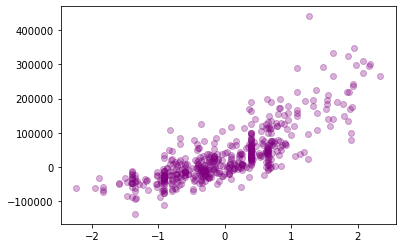

In [36]:
plt.scatter(lr_pred, lr_residuals, 
           c = 'purple', alpha = .3);

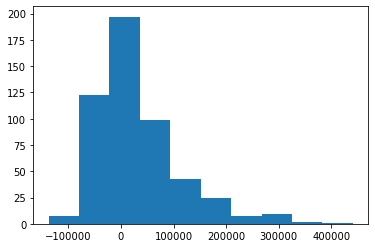

In [37]:
plt.hist(lr_residuals);

# Coefficients and Intercept

In [38]:
lr_coef = lr_model.coef_
lr_coef

array([[ 0.36781186, -0.03127948,  0.21418276, -0.02529873,  0.31913571,
         0.06901341,  0.39541018,  0.04307817,  0.25324084,  0.01384562,
         0.21139598]])

In [39]:
coef_df = pd.DataFrame({'feature': X.columns,
              'coef': lr_coef[0]})

coef_df[(coef_df['coef'] == 0)].sort_values('coef')
# coef_df['unitized'] = coef_df['coef'] * 

,feature,coef


In [40]:
coef_df[(coef_df['coef'] > 0.005) | 
        (coef_df['coef'] < -.005)].sort_values('coef')


,feature,coef
1,bsmt_full_bath,-0.031279
3,bsmt_half_bath,-0.025299
9,garage_type_CarPort,0.013846
7,garage_type_Basment,0.043078
5,garage_type_2Types,0.069013
10,garage_type_Detchd,0.211396
2,bsmt_finished,0.214183
8,garage_type_BuiltIn,0.253241
4,bsmt_qual,0.319136
0,kitchen_qual,0.367812


**Summary**

Using Scaled and Transformed features gives us coefficients which are uninterpretable to the target audience, so we will use a model that does not scale. Please see: LR - Renovations Not Scaled. 